In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from astropy.table import Table, join
from astropy import units as u
from edge_pydb import EdgeTable
from edge_pydb.beam_sample import beam_sample

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

## Average values over a central 26" beam (simulating APEX observations)

In [2]:
csvtab = 'edge_carma_apexres.csv'
if not os.path.isfile(csvtab):
    tab1  = EdgeTable('edge_carma_allpix.2d_smo7.hdf5', path='comom_smo')
    cotab = beam_sample(tab1, columnlist=['mom0_12', 'sigmol'], beam_final=26)
    tab2  = EdgeTable('edge_carma_allpix.2d_smo7.hdf5', path='flux_elines_sm')
    hatab = beam_sample(tab2, beam_final=26, 
                columnlist=['flux_Halpha_sm','flux_sigsfr0_sm','flux_sigsfr_adopt_sm'])
    tab3  = EdgeTable('edge_carma_allpix.2d_smo7.hdf5', path='SSP_sm')
    startab = beam_sample(tab3, beam_final=26, columnlist=['sigstar_sm'])
    join1 = join(cotab, hatab)
    join2 = join(join1, startab)
    join2.write(csvtab, format='ascii.ecsv', delimiter=',', overwrite=True)
bmtab = Table.read(csvtab, format='ascii.ecsv')
bmtab

Name,mom0_12,sigmol,flux_Halpha_sm,flux_sigsfr0_sm,flux_sigsfr_adopt_sm,sigstar_sm
,K km / s,solMass / pc2,1e-16 erg / (s cm2),solMass / (Gyr pc2),solMass / (Gyr pc2),solMass / pc2
str13,float64,float64,float64,float64,float64,float64
ARP220,85.47969818115234,371.8367004394531,1.66496741771698,6.974903583526611,nan,262.4408264160156
IC0480,15.498051643371582,67.41651916503906,1.050345778465271,4.400121688842773,10.214747428894043,111.52171325683594
IC0540,7.428671360015869,32.314720153808594,0.41312867403030396,1.7306843996047974,4.568840503692627,246.75975036621094
IC0944,12.602376937866211,54.82033920288086,0.45849117636680603,1.9207178354263306,12.892980575561523,542.0886840820312
IC1151,nan,nan,3.3438642024993896,14.008160591125488,20.47300148010254,180.8839111328125
IC1199,6.149745464324951,26.751392364501953,1.3991343975067139,5.861271381378174,14.212295532226562,357.27435302734375
IC1683,19.54743194580078,85.03132629394531,2.0428082942962646,8.557759284973145,45.87773513793945,314.4880065917969
IC2247,11.609688758850098,50.50214385986328,0.930316150188446,3.897291898727417,17.543182373046875,234.9615936279297


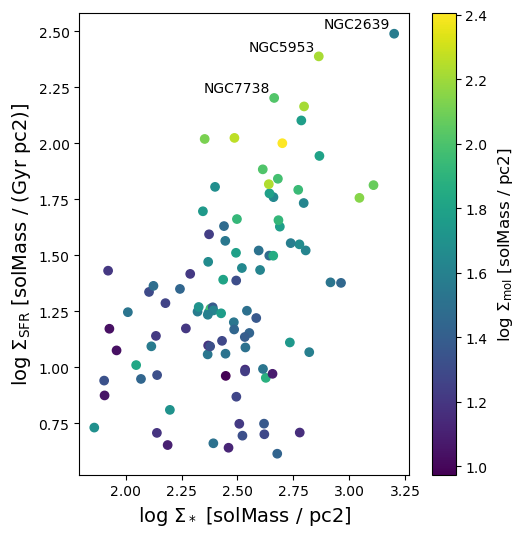

In [3]:
xdat = np.log10(bmtab['sigstar_sm'])
ydat = np.log10(bmtab['flux_sigsfr_adopt_sm'])

fig, ax = plt.subplots(figsize=(6,6))

im = ax.scatter(xdat, ydat, c=np.log10(bmtab['sigmol']))
for xpos, ypos, name in zip(xdat, ydat, bmtab['Name']):
    if ypos > 2.2:
        ax.annotate(name, (xpos,ypos), xytext=(-3,4), 
                    size='medium', textcoords='offset points',
                    horizontalalignment='right',zorder=3)
ax.set_aspect('equal')
plt.xlabel('log $\Sigma_*$'+' ['+str(bmtab['sigstar_sm'].unit)+']', fontsize=14)
plt.ylabel('log $\Sigma_{SFR}$'+' ['+str(bmtab['flux_sigsfr_adopt_sm'].unit)+']', fontsize=14)
cbar = plt.colorbar(im)
cbar.set_label('log $\Sigma_{mol}$'+' ['+str(bmtab['sigmol'].unit)+']', size=12, labelpad=6)

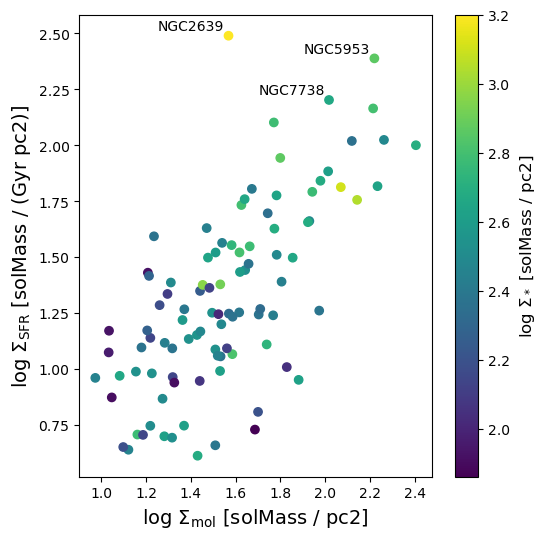

In [4]:
xdat = np.log10(bmtab['sigmol'])
ydat = np.log10(bmtab['flux_sigsfr_adopt_sm'])

fig, ax = plt.subplots(figsize=(6,6))

im = ax.scatter(xdat, ydat, c=np.log10(bmtab['sigstar_sm']))
for xpos, ypos, name in zip(xdat, ydat, bmtab['Name']):
    if ypos > 2.2:
        ax.annotate(name, (xpos,ypos), xytext=(-3,4), 
                    size='medium', textcoords='offset points',
                    horizontalalignment='right',zorder=3)
ax.set_aspect('equal')
plt.xlabel('log $\Sigma_{mol}$'+' ['+str(bmtab['sigstar_sm'].unit)+']', fontsize=14)
plt.ylabel('log $\Sigma_{SFR}$'+' ['+str(bmtab['flux_sigsfr_adopt_sm'].unit)+']', fontsize=14)
cbar = plt.colorbar(im)
cbar.set_label('log $\Sigma_*$'+' ['+str(bmtab['sigmol'].unit)+']', size=12, labelpad=6)